
## **Taming Expectation Maximization Algorithm**

Let us suppose we have a dataset with us, and we need to to estimate the probability distribution for this dataset. In order to do this, we define sometthing called a likelihood function, which is a function of the various parameters of a probability distribution, and which gives us the probability that the given data that's being observed is generated from a probability distribution with the given parameters. 


*   Let $X_i^n$ be a sample from $f(x; {\theta})$. The quantity $L(X_1,\dotsc, X_n; \theta) = \prod_{i=1}^n f(X_i; \theta)$ which is regarded as a function of $\theta$ given the observation $X_i^n$ is called the likelihood of the sample

Given a likelihood function and our dataset, our objective is to find out a set of parameters, for which we can maximize the value of our likelihood function, that is, we need to find a probability distribution which will be a good fit to our dataset.

*   Suppose $\widetilde{\theta} \in \Omega$ (where $\Omega$ is the parameter space) is such that $L(\widetilde{\theta}) = Max_{\theta \in \Omega}L(\theta)$, then $\widetilde{\theta}$ is said to be the Maximum Likelihood Estimator (MLE) of ${\theta}$.











#### Expectation Maximization

A limitation of maximum likelihood estimation is that it assumes that the dataset is complete, or fully observed. This does not mean that the model has access to all data; instead, it assumes that all variables that are relevant to the problem are present.

This is not always the case. There may be datasets where only some of the relevant variables can be observed, and some cannot, and although they influence other random variables in the dataset, they remain hidden. More generally, these unobserved or hidden variables are referred to as latent variables. 

Conventional maximum likelihood estimation does not work well in the presence of latent variables. It becomes hard, or sometimes impossible to find the MLE after we introduce latent variables in the dataset. 







#### Algorithm


*  The idea of the algorithm is that when direct maximization of $p(X|\theta)$ is complicated, we cam modify the data by introducing a latent variable Z, such that $p(X, Z|\theta)$ can be easily computed.

*   Let us assume we have an initial estimate for the parameter $\theta^{(t)}$, and we want to find a $\theta$, such that $p(X|\theta) > p(X|\theta^{(t)})$.

*   We try to find a $\theta$ which maximizes the value $L(\theta)-L(\theta^{(t)})$.

*   In this calculation, we consider the log-likelihood of the sample,

       \begin{align*}
        l(\theta) = \log L(\theta)
       \end{align*}

*   Now we have

  \begin{align*}
    l(\theta)-l(\theta^{(t)}) &= \log \frac{L(\theta)}{L(\theta^{(t)})}
    = log(\frac{p(X|\theta)}{p(X|\theta^{(t)})})
  \end{align*}

*   Now, we can add the latent variable $Z$ so that $p(X, Z|\theta)$ can be easily computed.
\begin{align*}
    l(\theta)-l(\theta^{(t)}) &= \log\frac{p(X|\theta)}{p(X|\theta^{(t)})}\\
    &= \log\frac{\int p(X, z|\theta)dz}{p(X|\theta^{(t)})}\\
    &= \log \left[\int\frac{p(z|\theta^{(t)}, X)p(X, z|\theta)}{p(z|\theta^{(t)}, X)p(X|\theta^{(t)})} dz \right]\\
    &\geq \int\left[p(z|\theta^{(t)}, X)\log\frac{p(X, z|\theta)}{p(z|\theta^{(t)}, X)p(X|\theta^{(t)})}dz\right]\\
    &= \Delta L(\theta; \theta^{(t)})
\end{align*}

*   Hence, we see that maximizing $\Delta L(\theta; \theta^{(t)})$ also maximizes $L(\theta; \theta^{(t)})$

*   Now, 
\begin{align*}
    \theta^{(t+1)} &= argmax_{\theta}\Delta L(\theta; \theta^{(t)})\\
    &= argmax_{\theta} \int\left[p(z|\theta^{(t)}, X)\log\frac{p(X, z|\theta)}{p(z|\theta^{(t)}, X)p(X|\theta^{(t)})}dz\right]\\
    &= argmax_{\theta} \int p(z|\theta^{(t)}, X)\log(p(X, z|\theta))dz
\end{align*}

*   Now, let us define
\begin{align*}
    Q(\theta; \theta^{(t)}) 
    = \int p(z|\theta^{(t)}, X)\log(p(X, z|\theta))dz
    = E_{Z|\theta^{(t)}, X}[p\log(X, Z|\theta)]
\end{align*}

### **Now, the algorithm becomes**
*   E-Step: Given the parameters $\theta^{(t)}$ from the previous iteration, compute $Q(\theta; \theta^{(t)})$, so that it is only in terms of $\theta$.
*    M-Step: Maximize $Q(\theta; \theta^{(t)})$ w.r.t $\theta$ to obtain the new parameters $\theta^{(t+1)}$.










### **In practical usage , the EM Algorithm becomes**
*    E-Step: Calculate the posterior probabilities using the parameters as given
*    M-Step: Update the parameters using the posterior probabilities.

#### EM Algorithm for Univariate Gaussian Mixture


*   In this case of 2 underlying gaussian distributions,Let them be $N(\mu_1,\sigma_1^2)$ ,$N(\mu_2,\sigma_2^2)$ with weights $\lambda,1-\lambda$ \\
$\theta = \{\lambda, \sigma_1^2, \sigma_2^2, \mu_1, \mu_2\}$ and p(x)=$\lambda N(\mu_1,\sigma_1^2)+ (1-\lambda)N(\mu_2,\sigma_2^2)$

*    We first compute $E(z_i)$ in the E-Step as follows
\begin{align*}
    E(z_i) = \frac{\lambda^{(t)}N(x_i|\mu_1^{(t)},(\sigma_1^{(t)})^2)}{\lambda^{(t)}N(x_i|\mu_1^{(t)},(\sigma_1^{(t)})^2)+(1-\lambda^{(t)})N(x_i|\mu_2^{(t)},(\sigma_2^{(t)})^2)}
\end{align*}

*   Let $m_i^1=E(z_i)$ and $m_i^2=1-E(z_i)$, and in the M-Step, by maximizing  $Q(\theta; \theta^{(t)})$ we have,

\begin{align*}
    \lambda^{(t+1)} &= \frac{1}{n}\sum_{i=1}^{n}m_i^1\\
    \mu_j^{(t+1)} &= \frac{\sum_{i=1}^{n}m_i^jx_i}{\sum_{i=1}^{n}m_i^j} \quad j=0,1\\
    \sigma_j^{(t+1)} &= \frac{\sum_{i=1}^{n}m_i^j(x_i-\mu_j^{(t+1)})^2}{\sum_{i=1}^{n}m_i^j} \quad j=0,1
\end{align*}

*   Check the convergence of log likelihood function and exit the loop if it converges.




### **Examples for Univariate Guassian Mixture Models**



####  Example 1

This is the basic example with 2 Univariate Normal distribution $N(\mu_1,\sigma_1^2)$ ,$N(\mu_2,\sigma_2^2)$

*   We are taking 2 Normal distributions $N(0,1)$ , $N(1,3)$ and randomly choosing 500 points from them
*   Now we are using EM algorithm to estimate 2 Univariate Normal distributions from 500 points 









In [ ]:
import numpy as np      
import random
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics as stat
from scipy.stats import norm

Generating 500 points from mixture of two univariate distributions

In [ ]:
x=[]
n = 500
for i in range(n):
  if np.random.random_sample()<0.3:
    x.append(np.random.normal(0, 1))
  else:
    x.append(np.random.normal(1, 3))

Plotting Desnity function of Sample

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density function of the sample')

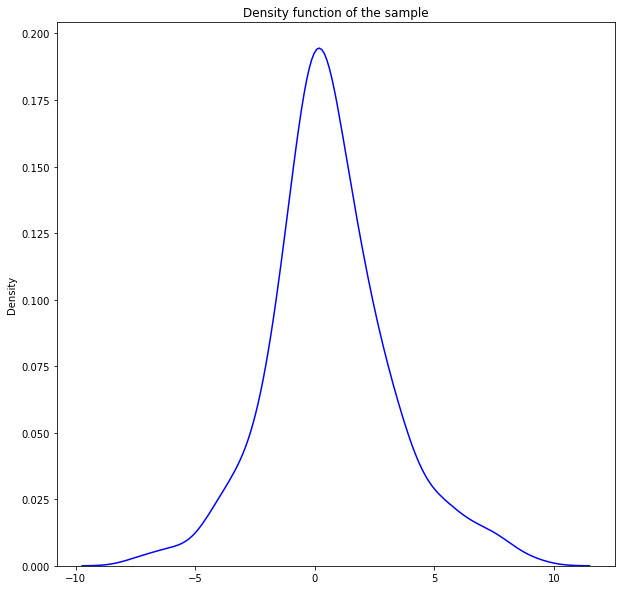

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(x, hist=False, kde=True, bins=int(180/5), color = 'blue')
plt.title('Density function of the sample')

This function implements EM algorithm 

In [ ]:
def EM(mu1,mu2,sig1,sig2,p1,p2,x):
  Q=[0]*n
  Q[1]=0
  Q[2]=sum(np.log(p1)+np.log(norm.pdf(x, mu1, sig1))) + sum(np.log(p2)+np.log(norm.pdf(x, mu2, sig2)))
  i=2

  while abs((Q[i]-Q[i-1])/Q[i])>=pow(10,-12):
    
    num1 = p1*norm.pdf(x, mu1, sig1)
    num2 = p2*norm.pdf(x, mu2, sig2)
    den = num1+num2

    i = i+1
    Q[i] = sum(np.log(den))

    cond1 = num1/den
    cond2 = num2/den

    p1 = sum(cond1)/n
    p2 = sum(cond2)/n

    mu1 = sum(cond1*x)/sum(cond1)
    mu2 = sum(cond2*x)/sum(cond2)

    sig1 = math.sqrt(sum(cond1*(x-mu1)*(x-mu1))/sum(cond1))
    sig2 = math.sqrt(sum(cond2*(x-mu2)*(x-mu2))/sum(cond2))

  return [mu1,mu2,sig1,sig2,p1,p2,Q[i]]

Randomly choosing Initial ${\mu_1}$ ,${\mu_2}$ , ${\sigma_1}$ ,${\sigma_2}$ and ${\pi_1}$ and finding the best estimate.

In [ ]:


maxlist=[]
for i in range(1,10):
  mu1=random.uniform(0, 3)
  mu2=random.uniform(0, 3)
  sig1=random.uniform(1, 5)
  sig2=random.uniform(1, 5)
  p1=random.uniform(0,1)
  p2=1-p1

  list1=EM(mu1,mu2,sig1,sig2,p1,p2,x)
  if i == 1:
    maxlist = list1
  else:
    if abs(maxlist[6]) < abs(list1[6]):
      maxlist = list1

Printing the best esitimate obtained among all the different initial values.

In [ ]:
print("Values obtained by EM Algorithm")
print("mu1 = ",maxlist[0])
print("mu2 = ",maxlist[1])
print("sig1 = ",maxlist[2])
print("sig2 = ",maxlist[3])
print("p1 = ",maxlist[4])
print("p2 = ",maxlist[5])

Values obtained by EM Algorithm
mu1 =  0.18258306108548836
mu2 =  0.9442677952478032
sig1 =  1.0757035911252388
sig2 =  3.116023549737219
p1 =  0.3868726553697529
p2 =  0.6131273446302473


Plotting distributions obtained from EM algorithm

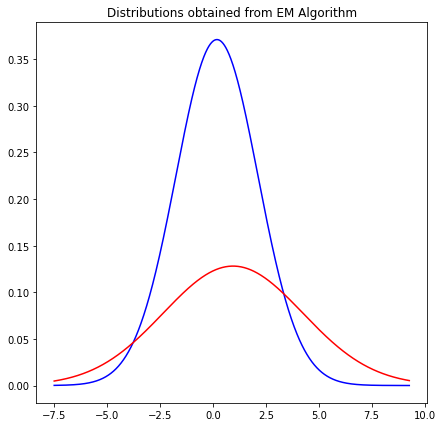

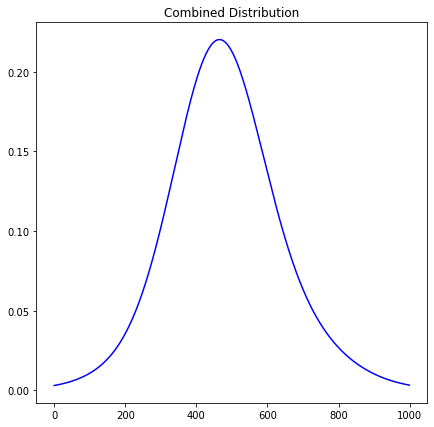

In [ ]:
x_=  np.linspace(min(x),max(x), num=1000)
g1=[0]*len(x_)
g2=[0]*len(x_)
g=[0]*len(x_)
i=0;
for pt in x_:
  g1[i]=(1/(maxlist[2]*math.sqrt(2*math.pi)))*math.exp((-1/2)*((pt-maxlist[0])/sig1)*((pt-maxlist[0])/maxlist[2]))
  g2[i]=(1/(maxlist[3]*math.sqrt(2*math.pi)))*math.exp((-1/2)*((pt-maxlist[1])/sig1)*((pt-maxlist[1])/maxlist[3]))
  g[i]=maxlist[4]*g1[i]+maxlist[5]*g2[i]
  i=i+1

plt.figure(figsize=(7,7))
plt.plot(x_,g1,color = 'blue')
plt.plot(x_,g2,color = 'red')
plt.title('Distributions obtained from EM Algorithm')
plt.show()


plt.figure(figsize=(7,7))
plt.plot(g,color = 'blue')
plt.title('Combined Distribution')
plt.show()


#### Example 2

We are taking a real dataset of Citi and S&P group for simple returns.

*   We are randomly mixing the data sets and using EM algorithm to approximate the distributions of of Citi and S&P groups
*   Here we are assuming the distributions of simple returns is univariate




In [ ]:
import numpy as np
import pandas as pd    
import random
import math
import statistics
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics as stat
from scipy.stats import norm

Loading data from datasets from URL.

In [ ]:
url = 'https://raw.githubusercontent.com/adityatumarada/EM-Algorithm/main/return.csv'
data = pd.read_csv(url)

In [ ]:
#Run only if u want to upload data from local drive
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#Run only if you downloaded data from local drive
#import io
#data = pd.read_csv(io.BytesIO(uploaded['return.csv']))

Printing mean and standard deviation for returns of Citi and S&P group.

In [ ]:

x1 = data["C"]
x2 = data["SP"]

print("Mean for C returns = ",statistics.mean(x1))
print("Mean for SP returns = ",statistics.mean(x2))
print("Standard deviation for C returns = ",statistics.stdev(x1))
print("Standard deviation for SP returns = ",statistics.stdev(x2))



Mean for C returns =  -0.0003779209348582794
Mean for SP returns =  -9.690004972650423e-05
Standard deviation for C returns =  0.0310547644318649
Standard deviation for SP returns =  0.013554418764786597


Ploting sample data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0.5, 1.0, 'Individual Distributions of the sample')

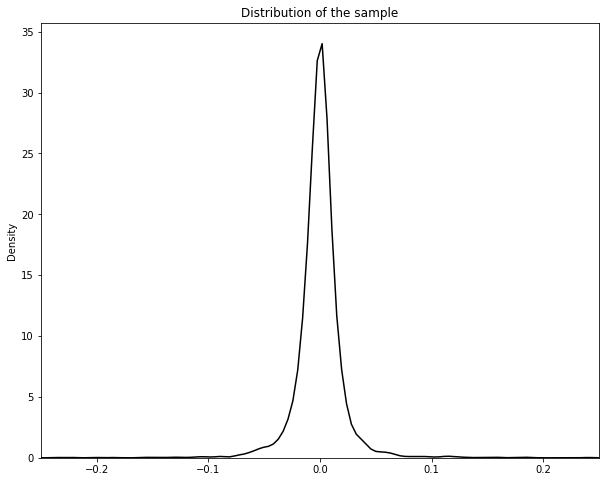

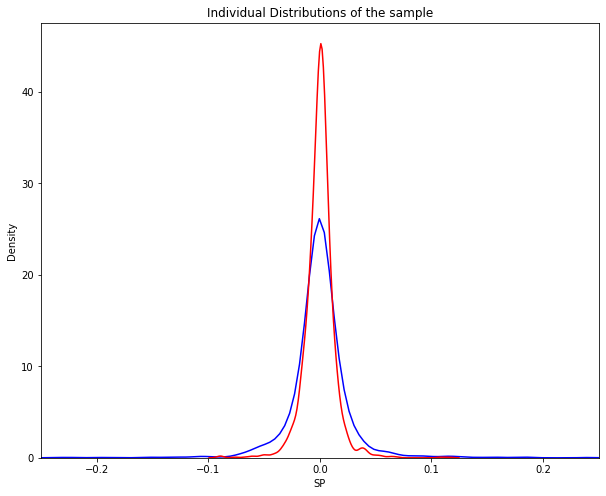

In [ ]:
x = np.concatenate([x1,x2])
n = x.size
#distribution graph
plt.figure(figsize=(10,8))
plt.xlim([-0.25, 0.25])
#plt.ylim([-3, 3])
sns.distplot(x, hist=False, kde=True, bins=int(180/5), color = 'black')

plt.title('Distribution of the sample')

plt.figure(figsize=(10,8))
plt.xlim([-0.25, 0.25])
#plt.ylim([-3, 3])
sns.distplot(x1, hist=False, kde=True, bins=int(180/5), color = 'blue')
sns.distplot(x2, hist=False, kde=True, bins=int(180/5), color = 'red')
plt.title('Individual Distributions of the sample')



This function implements EM algorithm.

In [ ]:
def EM(mu1,mu2,sig1,sig2,p1,p2,x):
  Q=[0]*n
  Q[1]=0
  Q[2]=sum(np.log(p1)+np.log(norm.pdf(x, mu1, sig1)) + np.log(p2)+np.log(norm.pdf(x, mu2, sig2)))
  i=2
  #Q function

  while abs((Q[i]-Q[i-1])/Q[i])>=pow(10,-12):
    
    num1 = p1*norm.pdf(x, mu1, sig1)
    num2 = p2*norm.pdf(x, mu2, sig2)
    den = num1+num2

    i = i+1
    Q[i] = sum(np.log(den))

    cond1 = num1/den
    cond2 = num2/den

    p1 = sum(cond1)/n
    p2 = sum(cond2)/n

    mu1 = sum(cond1*x)/sum(cond1)
    mu2 = sum(cond2*x)/sum(cond2)

    sig1 = math.sqrt(sum(cond1*(x-mu1)*(x-mu1))/sum(cond1))
    sig2 = math.sqrt(sum(cond2*(x-mu2)*(x-mu2))/sum(cond2))

  return [mu1,mu2,sig1,sig2,p1,p2,Q[i]]

Choosing Initial  𝜇1  , 𝜇2  ,  𝜎1  , 𝜎2  and  𝜋1.

In [ ]:
maxlist=[]


#mu1=random.uniform(-1, 0)
#mu2=random.uniform(-1, 0)
mu1=statistics.mean(x[1::2])
mu2 = statistics.mean(x[0::2]) 
#sig1=random.uniform(0, 0.001)
#sig2=random.uniform(0, 0.001)
sig1 = statistics.stdev(x[1::2])
sig2 = statistics.stdev(x[0::2])
p1=random.uniform(0,1)
p2=1-p1

list1=EM(mu1,mu2,sig1,sig2,p1,p2,x)
maxlist = list1



Printing values estimated using EM algorithm

In [ ]:
print("Values obtained by EM Algorithm")
print("mu1 = ",maxlist[0])
print("mu2 = ",maxlist[1])
print("sig1 = ",maxlist[2])
print("sig2 = ",maxlist[3])
print("p1 = ",maxlist[4])
print("p2 = ",maxlist[5])

Values obtained by EM Algorithm
mu1 =  -0.001133132093262737
mu2 =  -0.00010539176302764482
sig1 =  0.06075830864836222
sig2 =  0.010683424208148575
p1 =  0.1284553358284081
p2 =  0.8715446641715885


Plotting distributions obtained from EM algorithm

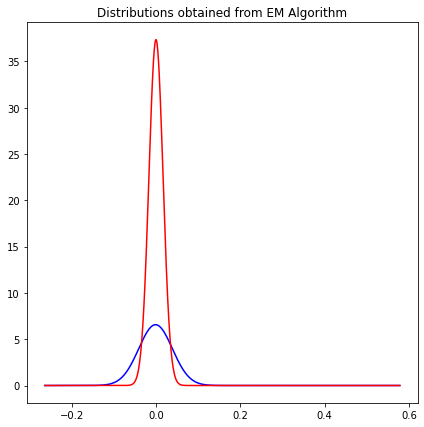

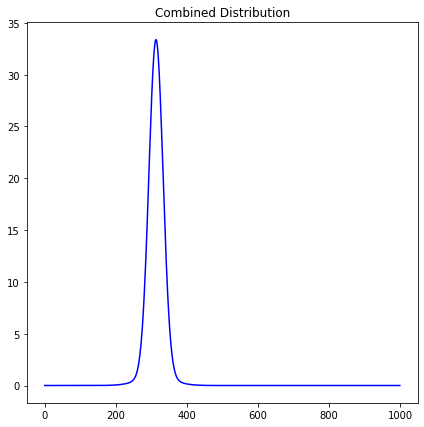

In [ ]:
x_=  np.linspace(min(x),max(x), num=1000)
g1=[0]*len(x_)
g2=[0]*len(x_)
g=[0]*len(x_)
i=0;
for pt in x_:
  g1[i]=(1/(maxlist[2]*math.sqrt(2*math.pi)))*math.exp((-1/2)*((pt-maxlist[0])/sig1)*((pt-maxlist[0])/maxlist[2]))
  g2[i]=(1/(maxlist[3]*math.sqrt(2*math.pi)))*math.exp((-1/2)*((pt-maxlist[1])/sig1)*((pt-maxlist[1])/maxlist[3]))
  g[i]=maxlist[4]*g1[i]+maxlist[5]*g2[i]
  i=i+1

plt.figure(figsize=(7,7))
plt.plot(x_,g1,color = 'blue')
plt.plot(x_,g2,color = 'red')
plt.title('Distributions obtained from EM Algorithm')
plt.show()


plt.figure(figsize=(7,7))
plt.plot(g,color = 'blue')
plt.title('Combined Distribution')
plt.show()


#### Conclusion

*   Here we are assuming the given sample as mixutre of two Univariate distribution we would get better approximation if we considered it as a mixutre of **N** Univariate Normal distributions








#### **Derivation for Multivariate Gaussian Mixture**

*   We now apply EM to a mixture of 2 multivariate Gaussian distributions with the mean vector $\boldsymbol{\mu_{k}}$, covariance matrix $\boldsymbol{\Sigma_k}$, and weight $\boldsymbol\lambda$.

*   The distribution of the mixture can be written as
\begin{align*}
    p(\boldsymbol{x}) = \lambda N(\boldsymbol{\mu_1}, \boldsymbol{\Sigma_1}) + (1-\lambda)N(\boldsymbol{\mu_2}, \boldsymbol{\Sigma_2})
\end{align*}

*   We introduce hidden variables $z_1, \dotsc, z_n$ where $z_i=1$ if $x_i$ comes from the 1st distribution, otherwise its 0.

*   The complete log-likelihood can be written as
\begin{align*}
    \log p(\boldsymbol{x_i}, z_i|\theta) &= \log\prod_{k=1}^2\left[\lambda_k\frac{1}{\sqrt{(2\pi)^d|\boldsymbol{\Sigma_k|}}}e^{-\frac{1}{2}(\boldsymbol{x_i}-\boldsymbol{\mu_k})^T\boldsymbol{\Sigma_k}^{-1}(\boldsymbol{x_i}-\boldsymbol{\mu_k})}\right]^{I_i^k}\\
    &= \sum_{k=1}^2{I_i^k}\log\left[\lambda_k\frac{1}{\sqrt{(2\pi)^d|\boldsymbol{\Sigma_k|}}}e^{-\frac{1}{2}(\boldsymbol{x_i}-\boldsymbol{\mu_k})^T\boldsymbol{\Sigma_k}^{-1}(\boldsymbol{x_i}-\boldsymbol{\mu_k})}\right]\\
\end{align*}
\
\begin{align*}
    \text{where $I_i^1$ = $z_i$ and $I_i^2$ = $1-z_i$}
\end{align*}

*   Now $Q(\theta; \theta^{(t)})$ can be written as,

\begin{align*}
    Q(\theta; \theta^{(t)}) 
    &= E\left[\sum_{i=1}^nz_i\log\lambda+(1-z_i)\log(1-\lambda)\right]\\ 
    &+ E\left[\sum_{i=1}^n-z_i\log\sqrt{|\boldsymbol{\Sigma_1|}}-(1-z_i)\log\sqrt{|\boldsymbol{\Sigma_2}|}\right]\\
    &+ E\left[\sum_{k=1}^2\sum_{i=1}^n-I_i^k\frac{1}{2}(x_i-\boldsymbol{\mu_k})^T\boldsymbol{\Sigma_k}^{-1}(x_i-\boldsymbol{\mu_k)}\right]
\end{align*}

*   Now, at the optimum value of $Q(\theta; \theta^{(t)})$, the following condition will be satisfied

\begin{align*}
    \frac{\partial Q(\theta; \theta^{(t)})}{\partial\theta} = 0
\end{align*}

*   We first compute $E(z_i)$ in the E-Step as follows

\begin{align*}
    E(z_i) = \frac{\lambda^{(t)}N(\boldsymbol{x_i}|\boldsymbol{\mu_1}^{(t)},\boldsymbol{\Sigma_1}^{(t)})}{\lambda^{(t)}N(\boldsymbol{x_i}|\boldsymbol{\mu_1}^{(t)},\boldsymbol{\Sigma_1}^{(t)})+(1-\lambda^{(t)})N(\boldsymbol{x_i}|\boldsymbol{\mu_2}^{(t)},\boldsymbol{\Sigma_2}^{(t)})}
\end{align*}

*   Let $m_i^1=E(z_i)$ and $m_i^2=1-E(z_i)$, and in the M-Step, by maximizing $Q(\theta; \theta^{(t)})$ we have,

\begin{align*}
    \lambda^{(t+1)} &= \frac{1}{n}\sum_{i=1}^{n}m_i^1\\
    \boldsymbol{\mu_j}^{(t+1)} &= \frac{\sum_{i=1}^{n}m_i^j\boldsymbol{x_i}}{\sum_{i=1}^{n}m_i^j} \quad j=0,1\\
    \boldsymbol{\Sigma_j}^{(t+1)} &= \frac{\sum_{i=1}^{n}m_i^j({\boldsymbol{x_i}}-\boldsymbol{\mu_j}^{(t+1)})(\boldsymbol{x_i}-\boldsymbol{\mu_j}^{(t+1)})^T}{\sum_{i=1}^{n}m_i^j} \quad j=0,1
\end{align*}








### **Examples for Bivariate Guassian Mixture Models**


#### Example 1
This is the basic example with 2 Bivariate Normal distribution $N(\boldsymbol{\mu_1}, \boldsymbol{\Sigma_1})$ ,$N(\boldsymbol{\mu_2}, \boldsymbol{\Sigma_2})$

*   We are taking 2 Bivariate Normal distributions with values
    \begin{align*}
    {\mu_1} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
    {\mu_2} = \begin{bmatrix} 7 \\ 7 \end{bmatrix}
    {\boldsymbol\Sigma_1} = \begin{bmatrix} 3 & 2 \\ 2 & 3 \end{bmatrix}
    {\boldsymbol\Sigma_2} = \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}
    \end{align*}

*   We are randomly choosing 400 points from both the distributions
*   Now we are using EM algorithm to estimate 2 Bivariate Normal distributions from 400 points 

In [ ]:
import numpy as np                          
from numpy.linalg import inv                    
import matplotlib.pyplot as plt                 
from scipy.stats import multivariate_normal     
import random
import math

In [ ]:
m1 = [1,1]                                                
m2 = [7,7]                                              
cov1 = [[3, 2], [2, 3]]                                      
cov2 = [[2, -1], [-1, 2]]

We are choosing 400 numbers randomly from two Bivariate Normal distributions

In [ ]:
d=[]
for i in range(400):
  x=0
  if np.random.random_sample()<0.1:
    x = np.random.multivariate_normal(m1, cov1)
  else:
    x = np.random.multivariate_normal(m2, cov2)
  if len(d)==0:
    d=np.array([x])
  else:
    d = np.concatenate((d, np.array([x])), axis=0)

Plotting the obtained 400 values

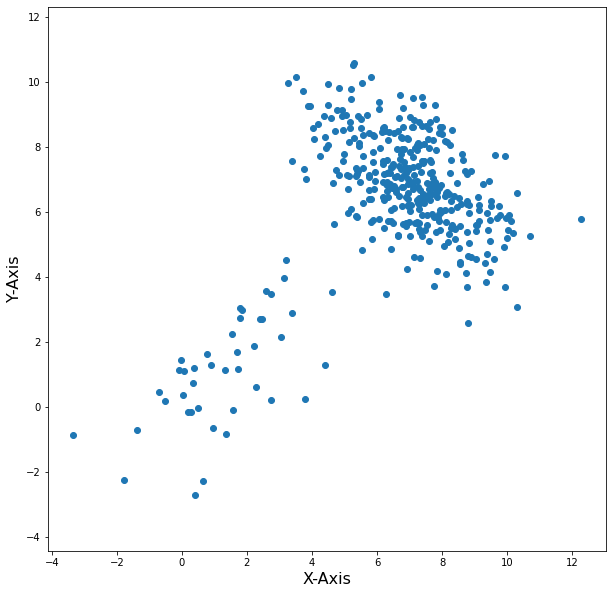

In [ ]:
plt.figure(figsize=(10,10))                                             
plt.scatter(d[:,0], d[:,1], marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('X-Axis', fontsize=16)                                                 
plt.ylabel('Y-Axis', fontsize=16)                                                                                                                                                                   
plt.show()

Randomly choosing Initial ${\mu_1}$ ,${\mu_2}$ , ${\Sigma_1}$ ,${\Sigma_2}$ 

In [ ]:
m1 = [random.randint(0,9),random.randint(0,9)]
m2 = [random.randint(0,9),random.randint(0,9)]
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5

Plotting the graph for Initial values of ${\mu_1}$ ,${\mu_2}$ , ${\Sigma_1}$ ,${\Sigma_2}$ 

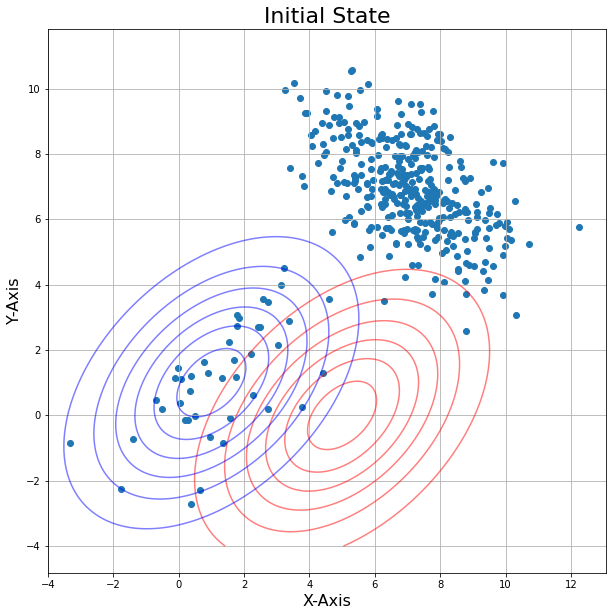

In [ ]:
x1 = np.linspace(-4,11,200)  
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                         
plt.scatter(d[:,0], d[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.axis('equal')                                                                  
plt.xlabel('X-Axis', fontsize=16)                                                  
plt.ylabel('Y-Axis', fontsize=16)                                                  
plt.title('Initial State', fontsize=22)                                           
plt.grid()                                                                         
plt.show()

This is the E-Step implemented according to the theory given above 

In [ ]:
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]
    
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

This is the M-Step implemented according to the theory given above 

In [ ]:
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(d)
    
    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [ ]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)  
    Z2 = multivariate_normal(mu2, s2)

    pos = np.empty(X.shape + (2,))                
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))                                                           
    plt.scatter(d[:,0], d[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.axis('equal')                                                                 
    plt.xlabel('X-Axis', fontsize=16)                                                  
    plt.ylabel('Y-Axis', fontsize=16)                                                 
    plt.grid()                                                                         
    plt.show()

In this funtion we are calculating Q value according to the theory given above. This is used in exit condition

In [ ]:
def Qval(eval1,lis1):
  m1=lis1[0]
  m2=lis1[1]
  cov1=lis1[2]
  cov2=lis1[3]
  pi=lis1[4]
  val = 0
  for i in range(400):
    val = val + (eval1[i]*(math.log10(pi))) + ((1-eval1[i])*(math.log10(1-pi)))
    cov1_det = abs(np.linalg.det(cov1))
    cov2_det = abs(np.linalg.det(cov2))
    val = val - (eval1[i]*(math.log10(math.sqrt(cov1_det)))) - ((1-eval1[i])*(math.log10(math.sqrt(cov2_det))))
    temp1 = np.dot((d[i]-m1),(np.linalg.inv(cov1)))
    temp1 = np.dot(temp1,(d[i]-m1).transpose())
    temp2 = np.dot((d[i]-m2),(np.linalg.inv(cov2)))
    temp2 = np.dot(temp2,(d[i]-m2).transpose())

    val = val - (1/2*eval1[i]*temp1) - (1/2*(1-eval1[i])*temp2)


  return(val)



Here we can see how the approximation gets better with each step of EM 

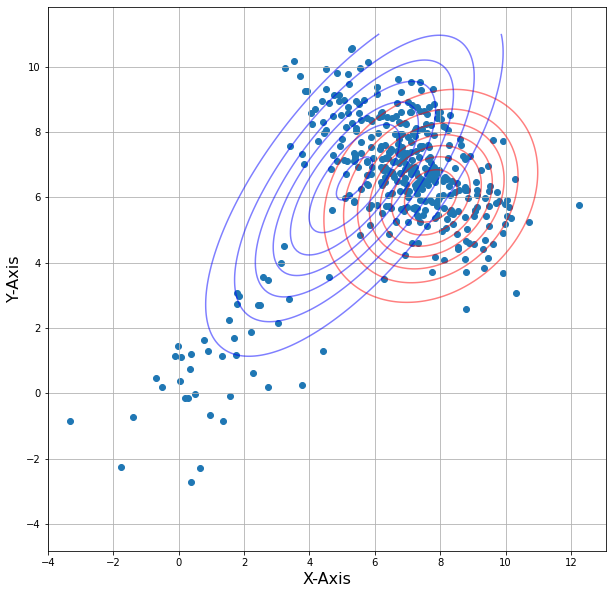

[array([7.71436335, 6.0428211 ]), array([5.37626392, 6.57575411]), matrix([[2.58277769, 0.57684042],
        [0.57684042, 2.56133188]]), matrix([[5.2415782 , 4.44500013],
        [4.44500013, 7.49103911]]), 0.5317209678147038]


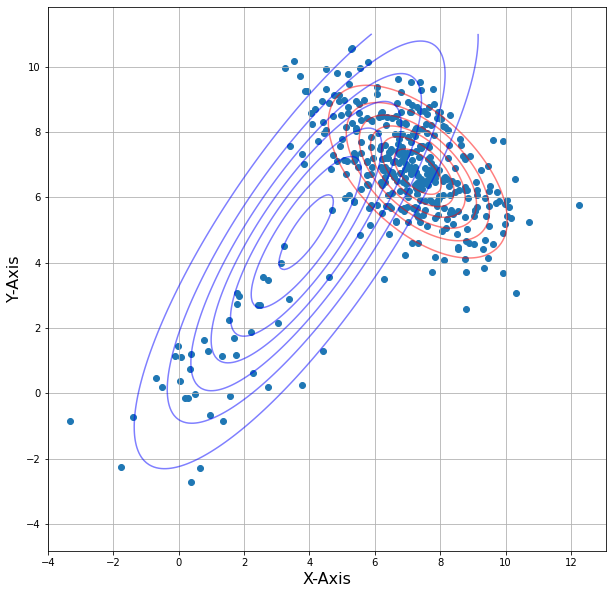

[array([7.31743505, 6.78467389]), array([3.90079271, 4.93368969]), matrix([[ 1.94691501, -1.06570703],
        [-1.06570703,  1.81386643]]), matrix([[ 6.93496276,  7.85899323],
        [ 7.85899323, 13.12199355]]), 0.24769586867893456]


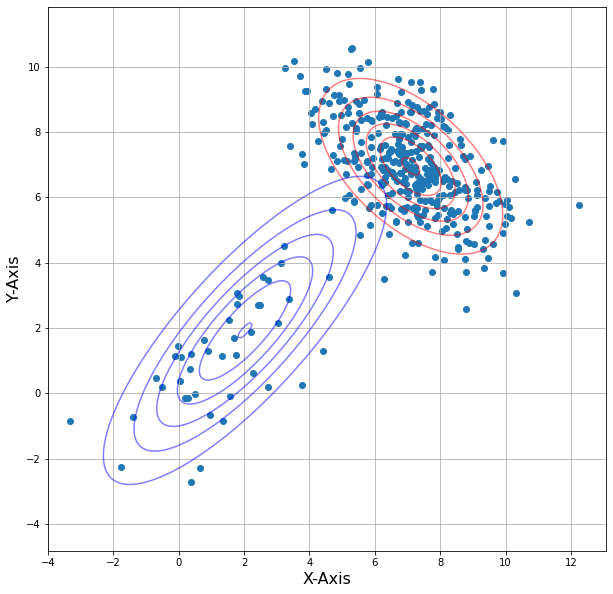

[array([7.09990322, 6.9489014 ]), array([2.02959717, 1.92736426]), matrix([[ 2.18824823, -1.16038087],
        [-1.16038087,  1.99461068]]), matrix([[5.22671862, 4.62920677],
        [4.62920677, 6.18370934]]), 0.12400757558745483]


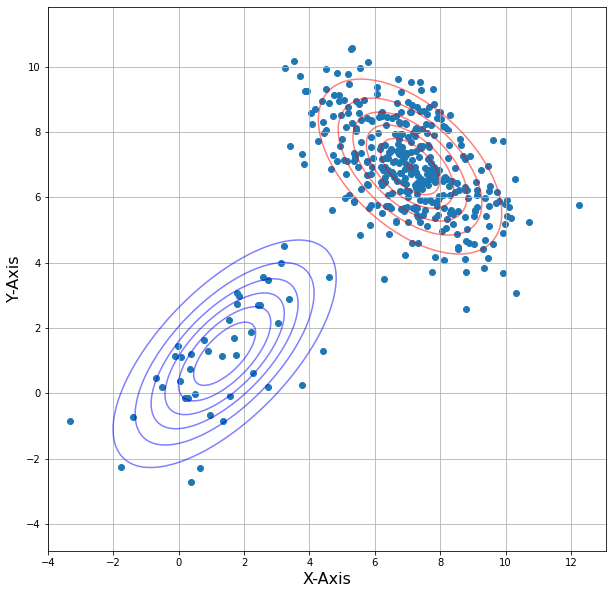

[array([7.07894473, 6.93981583]), array([1.40568907, 1.21218707]), matrix([[ 2.19252669, -1.12326082],
        [-1.12326082,  1.99483964]]), matrix([[2.99892925, 2.03486531],
        [2.03486531, 3.1183653 ]]), 0.10713387677775658]


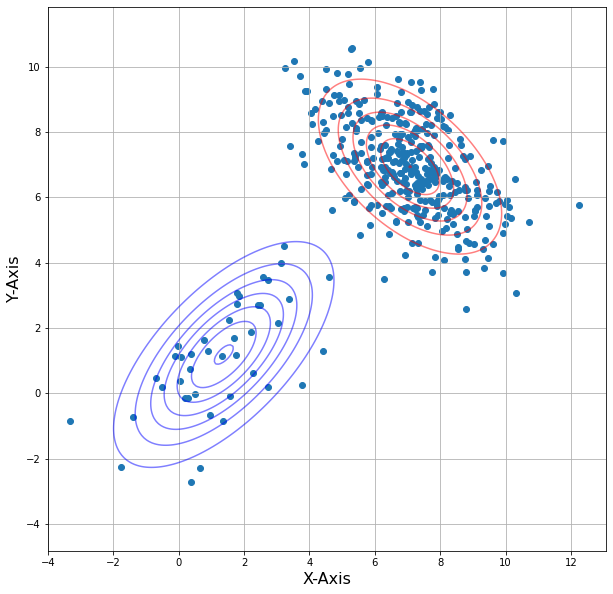

[array([7.07806963, 6.93849618]), array([1.3798424 , 1.18975146]), matrix([[ 2.19253545, -1.12100485],
        [-1.12100485,  1.99688799]]), matrix([[2.89791124, 1.94858921],
        [1.94858921, 3.04213966]]), 0.10651080482086384]


In [ ]:
# with iterations 
iterations = 20
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
        plot(lis1)
        print(lis1)

Here we are choosing 10 different initial values of ${\mu_1}$ ,${\mu_2}$ , ${\Sigma_1}$ ,${\Sigma_2}$ and selecting the best fit among them.

We do this because for some initial values EM algorithm may not converge to orginal values of ${\mu_1}$ ,${\mu_2}$ , ${\Sigma_1}$ ,${\Sigma_2}$

$(Q(i+1)-Q(i))/Q(i) < tol$  gives the exit condition for EM algorithm 

[]
[array([1.94932686, 2.2777978 ]), array([7.1285275 , 6.91474702]), matrix([[4.28294784, 4.89022937],
        [4.89022937, 8.97791441]]), matrix([[ 2.10923422, -1.09804751],
        [-1.09804751,  1.98269673]]), 0.8730729534207785]
[array([4.08187545, 3.08161934]), array([7.00796816, 7.05518324]), matrix([[12.97035421,  8.21941141],
        [ 8.21941141,  7.37022096]]), matrix([[ 2.07649348, -1.1344541 ],
        [-1.1344541 ,  1.88095462]]), 0.8165398861851338]
[array([1.38534606, 1.19446028]), array([7.07825717, 6.93878609]), matrix([[2.91943494, 1.96666055],
        [1.96666055, 3.05786311]]), matrix([[ 2.19253293, -1.12149528],
        [-1.12149528,  1.99641817]]), 0.8933567910669402]
[array([5.76575228, 8.26410382]), array([6.67362819, 5.76992139]), matrix([[ 1.21497518, -0.48658707],
        [-0.48658707,  0.99867826]]), matrix([[6.36302092, 3.63497615],
        [3.63497615, 5.08710693]]), 0.7769724633171379]
[array([7.17370212, 6.91071194]), array([3.51170627, 3.86396677]), ma

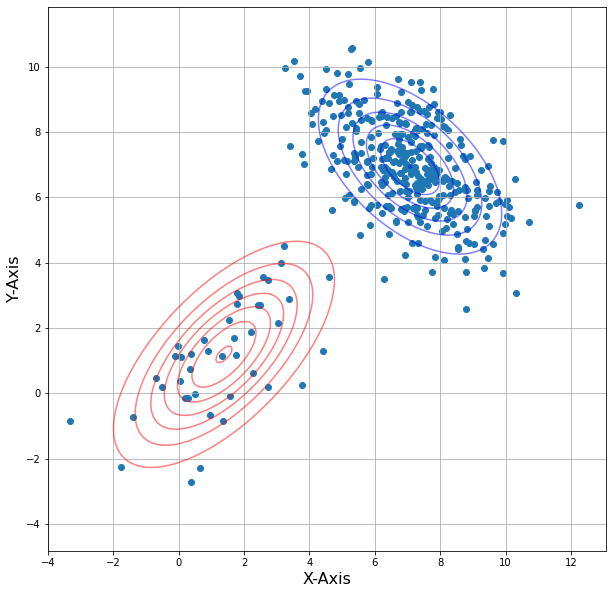

In [ ]:
# with Exit loop using Q value 
# We are calculating mean and covaiance with 5 different intitial values and choosing the best among them
max_Q = 0
lis_f = [] 
random.seed(1)
for i in range(1,10):
  m1 = [random.randint(0,9),random.randint(0,9)]
  m2 = [random.randint(0,9),random.randint(0,9)]
  cov1 = np.cov(np.transpose(d))
  cov2 = np.cov(np.transpose(d))
  pi = 0.5
  lis1=[m1,m2,cov1,cov2,pi]

  eval1 = Estep(lis1)
  lis2 = Mstep(eval1)
  eval2 = Estep(lis2)

  Q1 = Qval(eval1,lis1)
  Q2 = Qval(eval2,lis2)
  lisn = []
  while abs(Q2-Q1)/abs(Q1) > 0.01:
    Q1 = Q2;
    lisn = Mstep(Estep(lis2))
    lis2=lisn
    Q2 = Qval(Estep(lisn),lisn)
  print(lisn)
  if abs(max_Q) < abs(Q2):
    max_Q = Q2
    lis_f = lisn

print("\n\nThe best esitimate obtained among all the different initial values is:")
print(lis_f)
plot(lis_f)
  




Here we are comparing the Original data 400 points which we selected initially and used them in EM algorithm and the data obtained from the distribution approximated using EM algorithm 

In [ ]:
dem=[]
for i in range(400):
  x=0
  if np.random.random_sample()<0.1:
    x = np.random.multivariate_normal(lis_f[0], lis_f[2])
  else:
    x = np.random.multivariate_normal(lis_f[1], lis_f[3])
  if len(dem)==0:
    dem=np.array([x])
  else:
    dem = np.concatenate((dem, np.array([x])), axis=0)
  
  

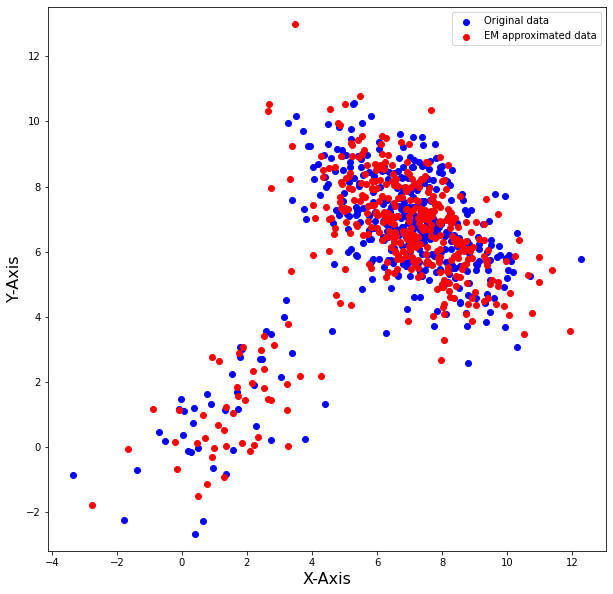

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(d[:,0], d[:,1], marker='o',color='b')                                              
plt.scatter(dem[:,0], dem[:,1], marker='o',color='r')       
plt.axis('equal')                                                                 
plt.xlabel('X-Axis', fontsize=16)                                                 
plt.ylabel('Y-Axis', fontsize=16)  
plt.legend(['Original data','EM approximated data'])                                                                                                                                                                 
plt.show()

#### Example 2

In this dataset , we are given various values for variables of a trasaction and a label whether the transaction is fraud or not.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('creditcard.csv') # add the path to creditcard.csv here
df.columns

We can get the correlation of all the variables and we could see that V14 and V17 are the most correlated

In [ ]:
c=df.cov()
c["V14"]["V17"]

By just plotting the variables , we can see that they have normal distribution and the distribution is different for both fraud and not fraud transactions.

In [ ]:
import matplotlib.gridspec as gridspec
features=['V17','V14', 'V11', 'V4', 'V15', 'V13']
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feat][df.Class==1], bins=30)
    sns.distplot(df[feat][df.Class==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

The basic idea is to find the multivariate normal model to fit the non fraud transactions and then use this model to calculate the probability of a given transaction to be not fraud . For this , we are splitting our non fraud transactions into 2 sets , 90% for training and 10% for testing .

In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn import mixture

df_0=df[df.Class==0]    #Dataset with non-fraudulent only
df_1=df[df.Class==1]    #Dataset with fraudulent only
df_0=df_0[['V14', 'V17','Class']]    #Select two most correlated features for now
df_1=df_1[['V14', 'V17', 'Class']]

#Split non-fraudulent data in 90% for training GMM and 10% for cross-validation and testing
X_train, X_test, y_train, y_test = train_test_split(df_0.drop(['Class'],axis=1), df_0['Class'] , test_size=0.1, random_state=0)
#Split the fraudulent data in 50% for cross-validation and 50% for testing
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1.drop(['Class'],axis=1), df_1['Class'] , test_size=0.5, random_state=0)


# Fit a Gaussian Mixture Model with the two components 'V14' and 'V17'
clf = mixture.GaussianMixture()
clf.fit(X_train)

Following are the parameters we got for the model fitting non fraud which we derived using EM Algorithm

In [ ]:
print(clf.weights_)
print(clf.means_)
print(clf.converged_)
print(clf.n_iter_)
print(clf.lower_bound_)

In python , the library function gaussain mixture gives us an attribute called score samples , which is the negative log probability for a given value to be generated by the obtained model. By our devation a high score sample means low probability of it being a non fraud transaction , which means it is fraud and low score sample means high probability of being a non fraud hence a non fraud transaction , this can be observed in the graph below.

In [ ]:
y_test_proba = clf.score_samples(np.vstack([X_test, X_test_1]))
plt.plot(y_test_proba)
plt.title('Predicted probabilities for test dataset')

In [ ]:
y_0=clf.score_samples(X_test)
print(y_0[:10])
y_1=clf.score_samples(X_test_1)
print(y_1[:10])

By taking the thresold to be 40 , we have a 0.63 percent accuracy in our prediction usig this model

In [ ]:
T=-40
y_test_proba[y_test_proba>=T]=0
y_test_proba[y_test_proba<T]=1
y_test_orig=np.hstack([y_test, y_test_1])

In [ ]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test_orig,y_test_proba)

### **Examples for Multivariate Guassian Mixture Models**

Using the dataset as above , we can use multiple variables instead of only 2 , to have multivariate normal distribution , using the same method as above and taking 5 variables , we could have the below

In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn import mixture

df_0=df[df.Class==0]    #Dataset with non-fraudulent only
df_1=df[df.Class==1]    #Dataset with fraudulent only
df_0=df_0[['V14', 'V17','V11','V4','V13','Class']]    #Select two most correlated features for now
df_1=df_1[['V14', 'V17','V11','V4','V13', 'Class']]

#Split non-fraudulent data in 90% for training GMM and 10% for cross-validation and testing
X_train, X_test, y_train, y_test = train_test_split(df_0.drop(['Class'],axis=1), df_0['Class'] , test_size=0.1, random_state=0)
#Split the fraudulent data in 50% for cross-validation and 50% for testing
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1.drop(['Class'],axis=1), df_1['Class'] , test_size=0.5, random_state=0)


# Fit a Gaussian Mixture Model with the two components 'V14' and 'V17'
clf = mixture.GaussianMixture()
clf.fit(X_train)

In [ ]:
print(clf.weights_)
print(clf.means_)
print(clf.converged_)
print(clf.n_iter_)
print(clf.lower_bound_)

In [ ]:
y_test_proba = clf.score_samples(np.vstack([X_test, X_test_1]))
plt.plot(y_test_proba)
plt.title('Predicted probabilities for test dataset')

In [ ]:
y_0=clf.score_samples(X_test)
print(y_0[:10])
y_1=clf.score_samples(X_test_1)
print(y_1[:10])

In [ ]:
T=-40
y_test_proba[y_test_proba>=T]=0
y_test_proba[y_test_proba<T]=1
y_test_orig=np.hstack([y_test, y_test_1])

In [ ]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test_orig,y_test_proba)

We can see that the multivariate model fit gave a better accuracy than bivariate model.

### Advantages and Disadvantages of EM algorithm

#### Advantages:

*   It is always guaranteed that likelihood will increase with each iteration.
*   Implementation is quite straightforward for many types of problems.
*   Very useful in unsupervised learning especially as a clustering algorithm.

#### Disadvantages:

*   It has slow convergence.
*   It makes convergence to the local optima only.






### Clustering with EM vs K-Means

*   While using the K-Means algorithm, we use hard assignment, i.e. while assigning a points to a cluster, a point can only be assigned to one cluster in an interation of the K-means algorithm. But in the case of the EM algorithm, for each point we assign a probability that the point lies in a perticular cluster. 

*   K-means uses the L2-norm while assigning a point to a cluster, i.e. the assignment is based on the distance between the centroid of the cluster to the given point, while EM algorithm assigns a point to a cluster based on the expectation, i.e. the probability of the point belonging to a perticular cluster. Because of this, we see that the K-means algorithm is biased towards forming spherical clusters, whereas in the case of EM algorithm, there is more freedom in the shape of the clusters that can be formed.